In [1]:
import graph_tool.all as gt
from packing_coloring.graph_generator import *
from packing_coloring.utils import *
from packing_coloring.algorithms.problem import *

from packing_coloring.algorithms.constructive.rlf_algo import *
from packing_coloring.algorithms.constructive.swo_algo import *
from packing_coloring.algorithms.perturbative.hybrid_algo import *
from packing_coloring.algorithms.perturbative.tabupackcol import *

import numpy as np
import pandas as pd
import igraph
np.set_printoptions(threshold=np.nan)

from IPython.html.widgets import interactive
from IPython.display import display
from os import listdir
from os.path import join, isfile
from pylab import get_cmap

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def square_grid_ha_pcoloring(size, file_name="test.pdf", out_size=(250,250), font_size=22):
    g = gt.lattice([size, size])
    dist_mat = get_distance_matrix(g)
    prob = GraphProblem(dist_mat)
    
    eval_func = lambda a: a.get_sum()
    ls_args = {"k_count":3, "tt_a":20, "tt_d":0.6, "max_iter":1000}
    init_args = {"iter_count":100, "blame_value":25, "blame_rate":0.85}
    p_col1 = hybrid_algorithm(prob, 10, 10, 2, partial_pack_col, ls_args, swo_algorithm, init_args, eval_func)

    pos = gt.sfdp_layout(g, max_iter=1)
    for i,v in enumerate(g.vertices()):
        pos[v][0] = np.floor(i/size)*2
        pos[v][1] = (i%size)*2

    max_col = p_col1.get_max_col()
    col = [c/max_col for c in p_col1]
    col_v = g.new_vertex_property("float")
    col_v.a = np.array(col)

    text_v = g.new_vertex_property("int")
    text_v.a = p_col1.pack_col.astype(int)

    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, output_size=out_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), output=file_name)
    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), inline=True)

    print(np.max(p_col1))
    print(p_col1)
    
def random_ha_pcoloring(file_name="test.pdf", out_size=(250,250), font_size=16):
    g = gt.load_graph("instances/dot_format/random.dot")
    dist_mat = get_distance_matrix(g)
    prob = GraphProblem(dist_mat)

    eval_func = lambda a: a.get_sum()
    ls_args = {"k_count":3, "tt_a":20, "tt_d":0.6, "max_iter":1000}
    init_args = {"iter_count":500, "blame_value":25, "blame_rate":0.85}
    p_col1 = hybrid_algorithm(prob, 10, 10, 2, partial_pack_col, ls_args, swo_algorithm, init_args, eval_func)
    
    pos = gt.sfdp_layout(g, cooling_step=0.95, epsilon=1e-2)
    max_col = p_col1.get_max_col()
    col = [c/max_col for c in p_col1]
    col_v = g.new_vertex_property("float")
    col_v.a = np.array(col)

    text_v = g.new_vertex_property("int")
    text_v.a = p_col1.pack_col.astype(int)

    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, output_size=out_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), output=file_name)
    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), inline=True)

    print(np.max(p_col1))
    print(p_col1)

def dist_ha_pcoloring(file_name="test.pdf", out_size=(250,250), font_size=16):
    g = generator.distance_graph((1, 2, 3), 768)
    dist_mat = get_distance_matrix(g)
    prob = GraphProblem(dist_mat)

    eval_func = lambda a: a.get_sum()
    ls_args = {"k_count":5, "tt_a":50, "tt_d":0.6, "max_iter":1000}
    init_args = {"iter_count":100, "blame_value":25, "blame_rate":0.85}
    p_col1 = hybrid_algorithm(prob, 10, 10, 2, partial_pack_col, ls_args, swo_algorithm, init_args, eval_func)
    
    pos = gt.sfdp_layout(g, cooling_step=0.95, epsilon=1e-2)
    max_col = p_col1.get_max_col()
    col = [c/max_col for c in p_col1]
    col_v = g.new_vertex_property("float")
    col_v.a = np.array(col)

    text_v = g.new_vertex_property("int")
    text_v.a = p_col1.pack_col.astype(int)

    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, output_size=out_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), output=file_name)
    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), inline=True)

    print(np.max(p_col1))
    print(p_col1)

# Packing coloration of 3x3 grid using TS

init candidate # 0 : 4
init candidate # 1 : 5
init candidate # 2 : 5
init candidate # 3 : 5
init candidate # 4 : 4
init candidate # 5 : 5
init candidate # 6 : 5
init candidate # 7 : 5
init candidate # 8 : 5
init candidate # 9 : 5
individu # 0 's quality: 4
individu # 1 's quality: 4
individu # 2 's quality: 4
individu # 3 's quality: 4
individu # 4 's quality: 4
individu # 5 's quality: 4
individu # 6 's quality: 4
individu # 7 's quality: 4
individu # 8 's quality: 4
individu # 9 's quality: 4
[[ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]]
generation # 0
child: 4
improved child:  4
mutated child:  5
improved mutated child:  4
[[ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]]

generation # 1
child: 4
improved child:  4
mutated child:  5
improved mutated child:  4
[[ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]]

generation # 

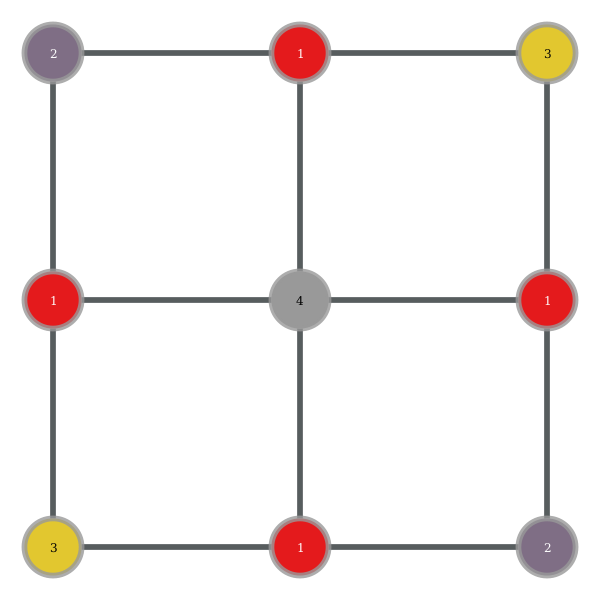

4
[2 1 3 1 4 1 3 1 2]


In [4]:
square_grid_ha_pcoloring(3, file_name="../Report/Pictures/HA_G3-3.pdf", out_size=(105, 150), font_size=12)

# Packing coloration of 24x24 grid using MA

init candidate # 0 : 22
init candidate # 1 : 124
init candidate # 2 : 44
init candidate # 3 : 27
init candidate # 4 : 114
init candidate # 5 : 27
init candidate # 6 : 71
init candidate # 7 : 108
init candidate # 8 : 115
init candidate # 9 : 27
individu # 0 's quality: 19
individu # 1 's quality: 123
individu # 2 's quality: 22
individu # 3 's quality: 18
individu # 4 's quality: 102
individu # 5 's quality: 18
individu # 6 's quality: 66
individu # 7 's quality: 100
individu # 8 's quality: 111
individu # 9 's quality: 19
[[  18 1681]
 [  18 1698]
 [  19 1692]
 [  19 1698]
 [  22 1882]
 [  66 3758]
 [ 100 6721]
 [ 102 6911]
 [ 111 7789]
 [ 123 9264]]
generation # 0
child: 89 0
improved child:  82
mutated child:  36
improved mutated child:  22
[[  18 1681]
 [  18 1698]
 [  19 1692]
 [  19 1698]
 [  22 1862]
 [  22 1882]
 [  66 3758]
 [  82 4983]
 [ 100 6721]
 [ 102 6911]
 [ 111 7789]
 [ 123 9264]]

generation # 1
child: 76 0
improved child:  28
mutated child:  48
improved mutated child:

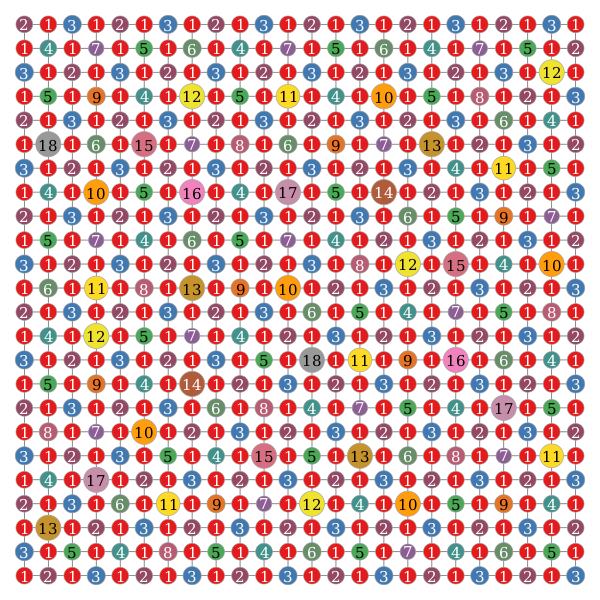

18
[ 2  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  1
  4  1  5  1 18  1  4  1  5  1  6  1  4  1  5  1  8  1  4  1 13  1  2  3  1
  2  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  5  1  1  7  1
  9  1  6  1 10  1  7  1 11  1 12  1  9  1  7  1 17  1  2  1  3  2  1  3  1
  2  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  6  1  4  1  1  5  1  4  1
 15  1  5  1  4  1  8  1  5  1  4  1 10  1  2  1  3  1  2  3  1  2  1  3  1
  2  1  3  1  2  1  3  1  2  1  3  1  5  1 11  1  8  1  1  6  1 12  1  7  1
 16  1  6  1 13  1  7  1 14  1  2  1  3  1  2  1  3  2  1  3  1  2  1  3  1
  2  1  3  1  2  1  3  1  6  1  4  1  9  1  5  1  1  4  1  5  1  8  1  4  1
  5  1  9  1  4  1  2  1  3  1  2  1  3  1  2  3  1  2  1  3  1  2  1  3  1
  2  1  3  1  5  1  8  1 15  1  7  1  4  1  1  7  1 11  1  6  1 17  1  7  1
 10  1  2  1  3  1  2  1  3  1  2  1  3  2  1  3  1  2  1  3  1  2  1  3  1
  6  1 18  1  4  1  5  1 12  1  6  1  1  5  1  4  1  9  1  5  1  4  1  2  1
  3  1  2

In [3]:
square_grid_ha_pcoloring(24, file_name="../Report/Pictures/HA_G24-24.pdf", out_size=(500, 500), font_size=15)

init candidate # 0 : 13
init candidate # 1 : 16
init candidate # 2 : 16
init candidate # 3 : 15
init candidate # 4 : 17
init candidate # 5 : 17
init candidate # 6 : 17
init candidate # 7 : 15
init candidate # 8 : 15
init candidate # 9 : 15
individu # 0 's quality: 12
individu # 1 's quality: 14
individu # 2 's quality: 12
individu # 3 's quality: 12
individu # 4 's quality: 12
individu # 5 's quality: 12
individu # 6 's quality: 13
individu # 7 's quality: 12
individu # 8 's quality: 12
individu # 9 's quality: 12
[[ 12 109]
 [ 12 110]
 [ 12 110]
 [ 12 110]
 [ 12 112]
 [ 12 112]
 [ 12 113]
 [ 12 114]
 [ 13 122]
 [ 14 136]]
generation # 0
child: 12
improved child:  12
mutated child:  14
improved mutated child:  11
[[ 11 104]
 [ 12 109]
 [ 12 109]
 [ 12 110]
 [ 12 110]
 [ 12 110]
 [ 12 112]
 [ 12 112]
 [ 12 113]
 [ 12 114]
 [ 13 122]
 [ 14 136]]

generation # 1
child: 12
improved child:  12
mutated child:  13
improved mutated child:  12
[[ 11 104]
 [ 12 109]
 [ 12 109]
 [ 12 109]
 [ 12 1

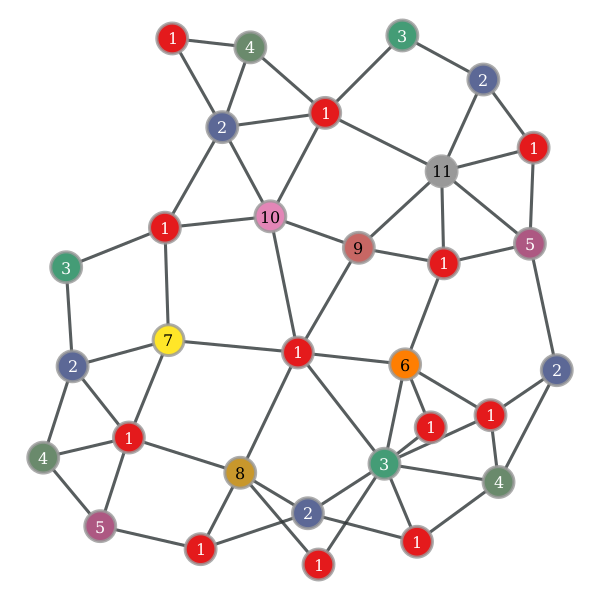

11
[ 4  3  1  8  1  6  1  7  2  5  1  1  9 10  1  3  1 11  1  2  2  3  2  4  1
  1  5  4  2  1  1]


In [5]:
random_ha_pcoloring(file_name="../Report/Pictures/HA_Random.pdf", out_size=(250,250), font_size=16)

In [ ]:
dist_ha_pcoloring(file_name="../Report/Pictures/HA_Dist.pdf", out_size=(250,250), font_size=16)

init candidate # 0 : 24
init candidate # 1 : 46
init candidate # 2 : 33
init candidate # 3 : 42
init candidate # 4 : 40
init candidate # 5 : 37
init candidate # 6 : 40
init candidate # 7 : 40
init candidate # 8 : 41
init candidate # 9 : 42
individu # 0 's quality: 22
individu # 1 's quality: 24
individu # 2 's quality: 24
individu # 3 's quality: 24
individu # 4 's quality: 24
individu # 5 's quality: 23
individu # 6 's quality: 24
individu # 7 's quality: 24
individu # 8 's quality: 23
individu # 9 's quality: 24
[[  22 4650]
 [  23 4994]
 [  23 5087]
 [  24 5058]
 [  24 5135]
 [  24 5141]
 [  24 5148]
 [  24 5171]
 [  24 5187]
 [  24 5231]]
generation # 0
child: